## Задание 3

Данные:
Имеются две модели, предсказывающие вероятность дефолта клиента и фактические наблюдения данного события (1 - факт дефолта клиента, 0 - отсутствие  дефолта клиента)

Задача:
Предложите метрику качества, позволяющую сравнить эти модели и выбрать наилучшую на основе представленных данных.  Также желательно предоставить графическую интерпретацию полученных результатов

*PD (Probability of default) - вероятность дефолта.


In [5]:
#Подключаем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns

import scipy.stats as stats

import matplotlib.pyplot as plt

import sklearn.metrics as metrics

#Загружаем данные, удостоверяемся, что загрузилось верно 
data = pd.read_csv('part3_data.csv', delimiter=";", decimal=',')
#data.info()

print(data.count())
data.head(5)

y      311
pd1    311
pd2    311
dtype: int64


,y,pd1,pd2
0,0,0.409821,0.526825
1,0,0.576899,0.606770
2,0,0.470889,0.499478
3,0,0.256406,0.334723
4,0,0.324825,0.403021


### Решение :

In [7]:
#В качестве меры ошибки оценки качества бинарных моделей предпочтительной метрикой является ROC-AUC  
#дополнительно RMSE  CrossEntropyLoss

#Переходим к векторам
y = data['y'].to_numpy()
pd1, pd2 = data['pd1'].to_numpy(), data['pd2'].to_numpy() 

In [20]:
# RMSE
n = y.shape[0] 

rmse1 = np.sqrt( (np.sum( (y - pd1)**2) / n ))
rmse2 = np.sqrt( (np.sum( (y - pd2)**2) / n ))
print('RMSE1 : {:.4f}   RMSE2 : {:.4f}'.format(rmse1, rmse2))

RMSE1 : 0.4732   RMSE2 : 0.5085


In [21]:
# CrossEntropyLoss

cel1 = metrics.log_loss(y, pd1)
cel2 = metrics.log_loss(y, pd2)

print('CEL1 : {:.4f}   CEL2 : {:.4f}'.format(cel1, cel2))

CEL1 : 0.6394   CEL2 : 0.7260


In [22]:
# AUC ROC

auc1 = metrics.roc_auc_score(y, pd1)
auc2 = metrics.roc_auc_score(y, pd2)
print('AUC1: {:.4f}    AUC2: {:.4f}'.format(auc1, auc2))

AUC1: 0.7014    AUC2: 0.6124


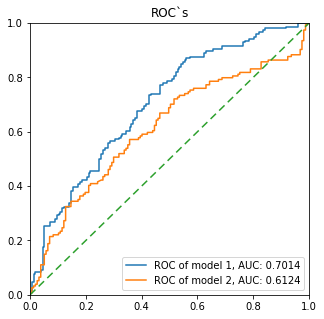

In [29]:
# AUC ROC PLOT
# Также желательно предоставить графическую интерпретацию полученных результатов

fpr1, tpr1, thresholds1 = metrics.roc_curve(y, pd1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y, pd2)

auc1, auc2 = np.trapz(tpr1, fpr1), np.trapz(tpr2, fpr2)

fig, axs = plt.subplots( figsize=(5,5))

roc1, = axs.plot(fpr1, tpr1, label="ROC of model 1, AUC: {:.4f}".format(auc1) )
roc2, = axs.plot(fpr2, tpr2, label="ROC of model 2, AUC: {:.4f}".format(auc2) )

plt.title('ROC`s')
plt.plot([0,1], [0,1], dashes=[5,3])
plt.xlim([0,1]); plt.ylim([0,1])

plt.legend( handles=[roc1, roc2], loc = 'lower right',)
plt.show()

In [33]:
# сводная таблица результатов
n_data = [('model 1', 'rmse',  rmse1) ,
          ('model 1', 'cel',  cel1) ,
          ('model 1', 'auc',  auc1) ,
          ('model 2', 'rmse', rmse2),
          ('model 2', 'cel', cel2),
          ('model 2', 'auc',  auc2) ,
         ]

columns = ['model', 'error_metric', 'value', ]

df = pd.DataFrame(n_data, columns=columns)
print(df.sort_values(['model','error_metric']))

     model error_metric     value
2  model 1          auc  0.701381
1  model 1          cel  0.639422
0  model 1         rmse  0.473222
5  model 2          auc  0.612375
4  model 2          cel  0.726018
3  model 2         rmse  0.508513


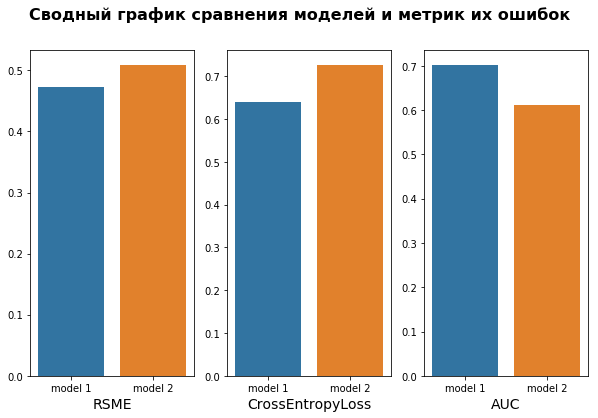

In [34]:
# 
fig, axs = plt.subplots(ncols=3, figsize=(10,6))

fig.suptitle("Сводный график сравнения моделей и метрик их ошибок", fontsize=16, fontweight='bold') 

sns.barplot(x='model', y='value', data=df[df['error_metric']=='rmse'], ax=axs[0])
sns.barplot(x='model', y='value', data=df[df['error_metric']=='cel'], ax=axs[1])
sns.barplot(x='model', y='value', data=df[df['error_metric']=='auc'], ax=axs[2])

for sub_axs in axs:
    sub_axs.set_ylabel('');

axs[0].set_xlabel('RSME', fontsize=14); 
axs[1].set_xlabel('CrossEntropyLoss' , fontsize=14)
axs[2].set_xlabel('AUC', fontsize=14)

plt.show(fig)

In [ ]:
# График демонстрирует что, результаты прогноза модели №1 точнее чем у модели№ 2, 
# поэтому модель № 1 будет являться более предпочтительной